<a href="https://colab.research.google.com/github/JGuarnizo/Coding_Dojo/blob/main/Machine_Learning/Week8_KMeans/Ejercicio_KMeans_JG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio sobre KMeans
##Por: José Guarnizo
Tu tarea es realizar la segmentación de clientes utilizando KMeans. Nos interesa agrupar a nuestros clientes en grupos basados en características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de forma eficaz. Usaremos la edad del cliente, los años de educación en el empleo, los ingresos, la deuda, si incumplieron y la relación deuda: ingresa el índice para separarlos por segmentos.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [61]:
df=pd.read_csv("https://raw.githubusercontent.com/JGuarnizo/Coding_Dojo/main/Machine_Learning/Week8_KMeans/cust_seg.csv")

In [62]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [63]:
#Búsqueda de valores nulos
df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [64]:
#Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [65]:
#Unnamed: 0 & Customer Id tienen valores únicos en cada observación. 
#Se elimina Unnamed: 0 y Customer_Id se hace índice
df=df.drop(columns=['Unnamed: 0'])
df.index=df['Customer Id']

In [66]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [67]:
#Se rellena valores de 'Defaulted'
df['Defaulted']=df['Defaulted'].fillna(2)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


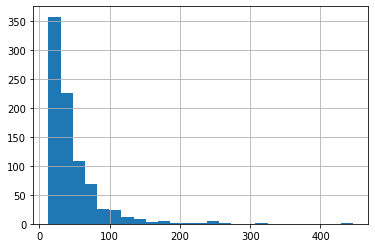

In [69]:
df['Income'].hist(bins=25);

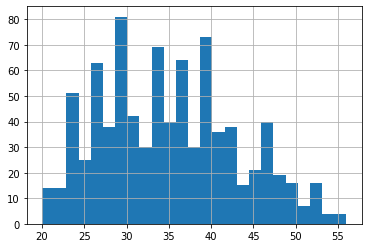

In [70]:
df['Age'].hist(bins=25);

## Parte 1
Utiliza KMeans para crear varios segmentos de clientes.

In [75]:
#Escalador
scaler = StandardScaler()
# Ajuste y transformación de datos
X = scaler.fit_transform(df)

In [76]:
#Algoritmo KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

##Parte 2
Explora tus diversos segmentos de clientes. ¿Cuáles son las tendencias en los segmentos? Crea al menos dos visualizaciones que exploren las tendencias en los grupos.

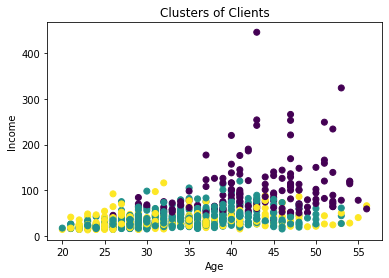

In [73]:
# Visualiza los clusters
plt.scatter(df['Age'], df['Income'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters of Clients');

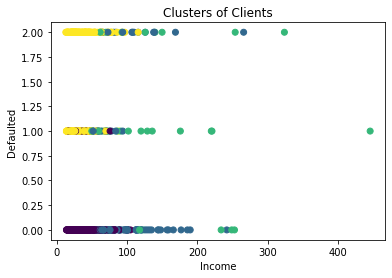

In [77]:
# Visualiza los clusters
plt.scatter(df['Income'], df['Defaulted'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('Defaulted')
plt.title('Clusters of Clients');